In [1]:
# Libraries for data handling and preprocessing
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for text processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# General utilities
import warnings
warnings.filterwarnings("ignore")

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [29]:
# Load dataset
file_path = 'real_estate_data/uae_real_estate_2024.csv'  
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Check dataset structure
print("\nDataset info:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Summary statistics for numerical features
print("\nSummary statistics:")
# Convert to standard formatting
pd.options.display.float_format = '{:,.2f}'.format
print(df.describe())



First 5 rows of the dataset:


,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,2024-08-14T12:02:53Z,Residential for Sale,2500000,True,sell,1323 sqft,NO,MNA Properties is delighted to offer this apar...
1,Full Sea View | Beach Life | Brand New Residence,"La Vie, Jumeirah Beach Residence, Dubai",3,2,2024-08-13T05:45:16Z,Residential for Sale,7200000,True,sell,1410 sqft,YES,"Apartment for sale in La Vie, Jumeirah Beach R..."
2,Green Belt | Corner Unit | Spacious Plot,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,2024-08-14T06:24:28Z,Residential for Sale,3600000,True,sell,2324 sqft,NO,Treo Homes is very pleased to be bringing to t...
3,2BR+Study | Near Pool and Park | Private,"Springs 15, The Springs, Dubai",3,2,2024-08-15T06:07:22Z,Residential for Sale,2999999,True,sell,1647 sqft,NO,2 Bedrooms + Study | Near Pool &amp; Park | Pr...
4,Vacant | Well Maintained | Area Expert,"Noor Townhouses, Town Square, Dubai",3,3,2024-08-09T08:28:59Z,Residential for Sale,2449999,True,sell,2105 sqft,NO,-Type 1\n-3 Bed+Maid\n-Close To Amenities\n-BU...



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5058 entries, 0 to 5057
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           5058 non-null   object
 1   displayAddress  5058 non-null   object
 2   bathrooms       4938 non-null   object
 3   bedrooms        4935 non-null   object
 4   addedOn         5058 non-null   object
 5   type            5058 non-null   object
 6   price           5058 non-null   int64 
 7   verified        5058 non-null   bool  
 8   priceDuration   5058 non-null   object
 9   sizeMin         5058 non-null   object
 10  furnishing      5056 non-null   object
 11  description     5057 non-null   object
dtypes: bool(1), int64(1), object(10)
memory usage: 439.7+ KB

Missing values in each column:
title               0
displayAddress      0
bathrooms         120
bedrooms          123
addedOn             0
type                0
price               0
verified      

In [11]:
# Summary statistics for numerical features
print("Numerical Feature Statistics:")
print(df.describe())

# Value counts for categorical features
print("\nCategorical Feature Value Counts:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Numerical Feature Statistics:
               price
count       5,058.00
mean    5,050,923.61
std    10,009,278.20
min       100,000.00
25%     1,200,000.00
50%     2,350,000.00
75%     4,499,375.00
max   199,000,000.00

Categorical Feature Value Counts:

title value counts:
title
Maya Luxury Collection | Spacious | Ready Soon        3
Your dream villa for sale, Al Yasmeen area, Ajman,    3
Waterfront | Emaar | Luxury | PP 80/20                3
Modern design | Smart Homes | Prime location          3
1%Monthly \\Near Airport \\5Years P.P\\Best Deal      3
                                                     ..
NO COMMISSION - VACANT - L GARDEN - WELL LOCATED      1
Investor Deal | Sea Canal View | Spacious             1
Corner Unit | Near Pool | Vacant | 4BR + Maids        1
WITH BEACH ACCESS | BALCONY | UNFURNISHED             1
Corner unit | HO Nov 2024| Post-handover PP           1
Name: count, Length: 5002, dtype: int64

displayAddress value counts:
displayAddress
Hayyan, Sharjah   

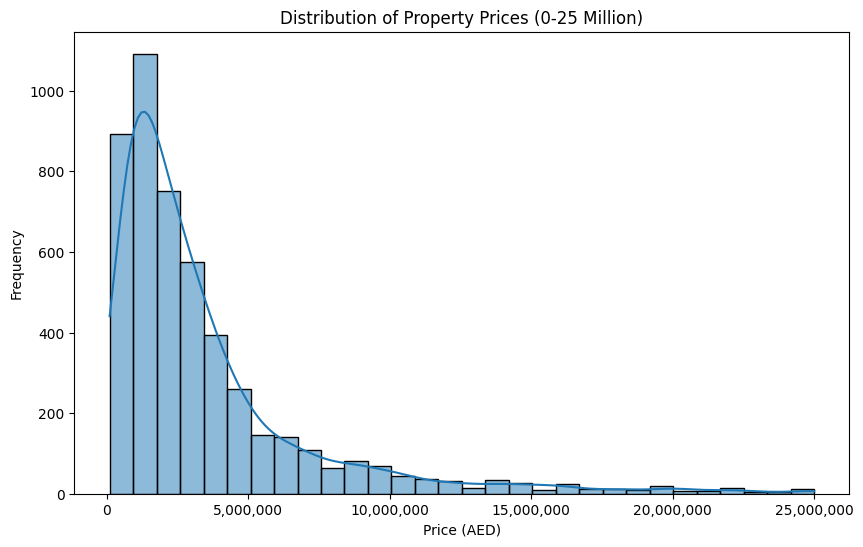

In [16]:
import matplotlib.ticker as mtick

# Clip prices to focus on the 0-25 million range
price_cap = 25_000_000  # Define a cap (25 million in this case)
df_clipped = df[df['price'] <= price_cap]

# Plot the histogram for clipped data
plt.figure(figsize=(10, 6))
sns.histplot(df_clipped['price'], kde=True, bins=30)
plt.title("Distribution of Property Prices (0-25 Million)")
plt.xlabel("Price (AED)")
plt.ylabel("Frequency")

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.show()




In [30]:
# Convert to string before extracting
df['sizeMin'] = df['sizeMin'].astype(str)

# Extract numeric portion
df['sizeMin'] = df['sizeMin'].str.extract('(\d+)').astype(float)



In [31]:
print(df["sizeMin"])

0      1,323.00
1      1,410.00
2      2,324.00
3      1,647.00
4      2,105.00
         ...   
5053   1,268.00
5054     854.00
5055   3,813.00
5056   1,300.00
5057   3,685.00
Name: sizeMin, Length: 5058, dtype: float64


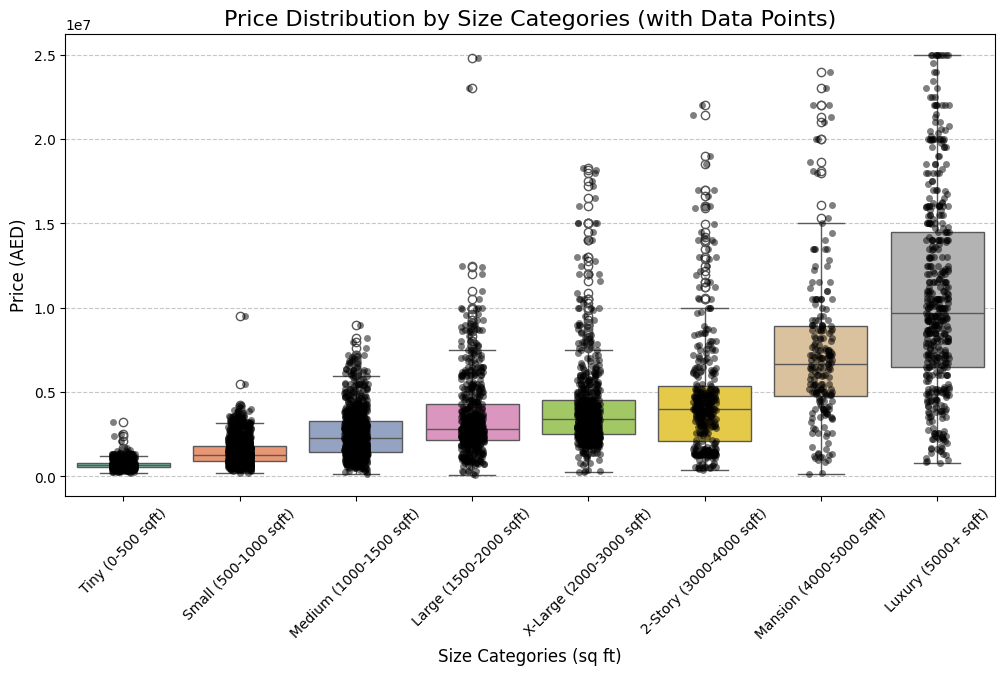

In [34]:
# Size vs Price
# Define size bins
bins = [0, 500, 1000, 1500, 2000, 3000, 4000, 5000, np.inf]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-3000', '3000-4000', '4000-5000', '5000+']

# Create a new column for size categories
df['size_category'] = pd.cut(df['sizeMin'], bins=bins, labels=labels, right=False)

df['size_category'] = df['size_category'].cat.rename_categories({
    '0-500': 'Tiny (0-500 sqft)',
    '500-1000': 'Small (500-1000 sqft)',
    '1000-1500': 'Medium (1000-1500 sqft)',
    '1500-2000': 'Large (1500-2000 sqft)',
    '2000-3000': 'X-Large (2000-3000 sqft)',
    '3000-4000': '2-Story (3000-4000 sqft)',
    '4000-5000': 'Mansion (4000-5000 sqft)',
    '5000+': 'Luxury (5000+ sqft)'
})

df_filtered = df[df['price'] <= 25_000_000]


plt.figure(figsize=(12, 6))
sns.boxplot(x='size_category', y='price', data=df_filtered, palette="Set2")
sns.stripplot(x='size_category', y='price', data=df_filtered, color='black', alpha=0.5, jitter=True)
plt.title("Price Distribution by Size Categories (with Data Points)", fontsize=16)
plt.xlabel("Size Categories (sq ft)", fontsize=12)
plt.ylabel("Price (AED)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [53]:
# Encode categorical columns (e.g., furnishing)
df['furnishing_encoded'] = df['furnishing'].map({'NO': 0, 'YES': 1})


for item in df['furnishing']:
    if item != 'YES':
        if item != 'NO':
                print(item)

PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY
PARTLY

In [55]:
print(df['furnishing_encoded'].value_counts())


furnishing_encoded
0.00    3630
1.00    1015
2.00     411
Name: count, dtype: int64


0           NO
1          YES
2           NO
3           NO
4           NO
         ...  
5053    PARTLY
5054        NO
5055        NO
5056        NO
5057        NO
Name: furnishing, Length: 5058, dtype: object
0      0.00
1      1.00
2      0.00
3      0.00
4      0.00
       ... 
5053   2.00
5054   0.00
5055   0.00
5056   0.00
5057   0.00
Name: furnishing_encoded, Length: 5058, dtype: float64


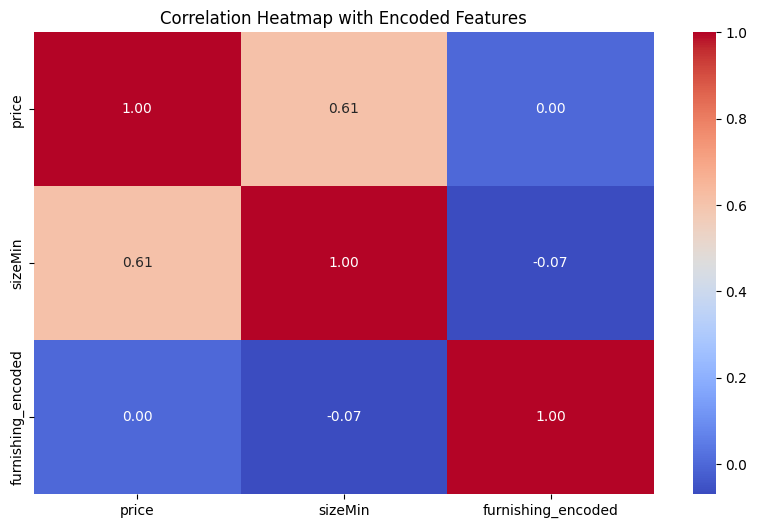

In [54]:
# Heatmap of correlations
# Select only numeric columns
# Encode categorical columns (e.g., furnishing)
df['furnishing_encoded'] = df['furnishing'].map({'NO': 0, 'YES': 1, 'PARTLY':2})

print((df["furnishing"]))
print((df['furnishing_encoded']))
# Recompute numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])



# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Encoded Features")
plt.show()





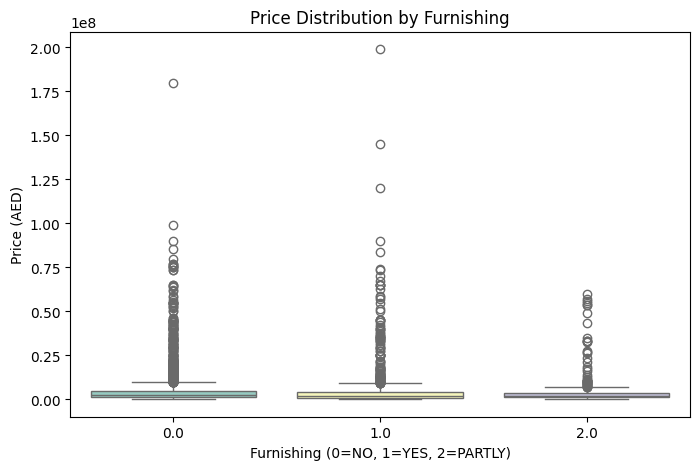

In [57]:
# Boxplot to visualize furnishing vs. price
plt.figure(figsize=(8, 5))
sns.boxplot(x='furnishing_encoded', y='price', data=df, palette="Set3")
plt.title("Price Distribution by Furnishing")
plt.xlabel("Furnishing (0=NO, 1=YES, 2=PARTLY)")
plt.ylabel("Price (AED)")
plt.show()


In [58]:
from scipy.stats import f_oneway

# Separate prices by furnishing categories
price_no = df[df['furnishing_encoded'] == 0]['price']
price_yes = df[df['furnishing_encoded'] == 1]['price']
price_partly = df[df['furnishing_encoded'] == 2]['price']

# Perform ANOVA test
f_stat, p_value = f_oneway(price_no, price_yes, price_partly)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 4.1243528170996, P-value: 0.01622843866655159


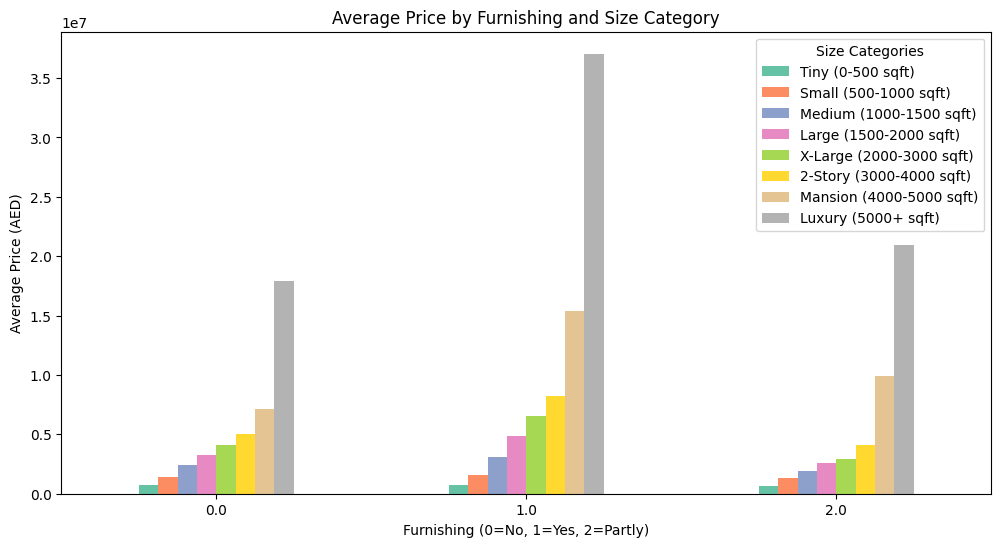

In [59]:
# Group by furnishing and size categories to calculate mean price
avg_price_by_furnishing_size = df.groupby(['furnishing_encoded', 'size_category'])['price'].mean().unstack()

# Plot
avg_price_by_furnishing_size.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Average Price by Furnishing and Size Category")
plt.xlabel("Furnishing (0=No, 1=Yes, 2=Partly)")
plt.ylabel("Average Price (AED)")
plt.xticks(rotation=0)
plt.legend(title="Size Categories")
plt.show()


In [61]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Pairwise comparisons
tukey = pairwise_tukeyhsd(endog=df['price'], groups=df['furnishing_encoded'], alpha=0.05)
print(tukey)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------
   0.0    1.0   795589.9524 0.1128   -117254.2715  1708434.1764  False
   0.0    2.0  -751946.5443 0.4717  -2089959.5909   586066.5022  False
   0.0    nan -1102808.1234 0.9987 -19287031.4279  17081415.181  False
   1.0    2.0 -1547536.4968 0.0407  -3050664.5391   -44408.4545   True
   1.0    nan -1898398.0759 0.9933 -20095515.7648 16298719.6131  False
   2.0    nan  -350861.5791    1.0 -18574255.5144 17872532.3562  False
----------------------------------------------------------------------


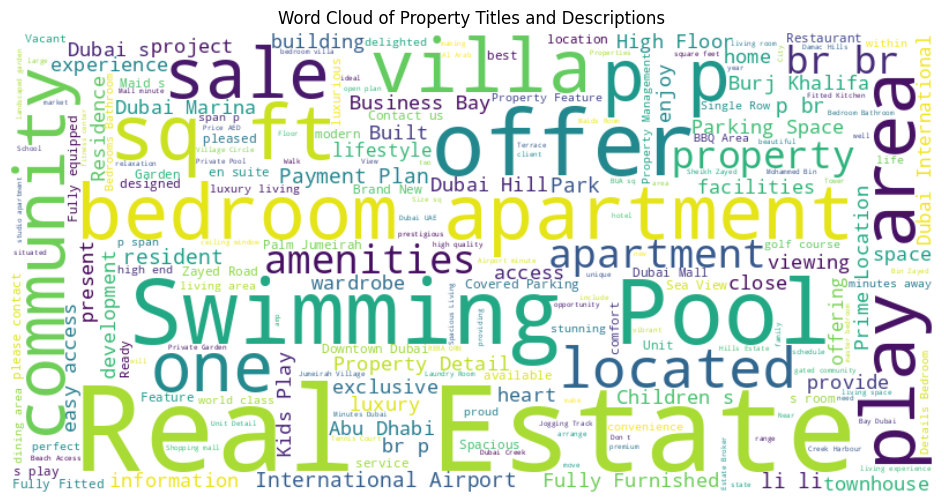

In [37]:
from wordcloud import WordCloud

# Combine title and description text
text_data = ' '.join(df['title'].fillna('') + ' ' + df['description'].fillna(''))

# Generate Word Cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text_data)

# Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Property Titles and Descriptions")
plt.show()


In [66]:
# Replace non-numeric values
df['bathrooms'] = df['bathrooms'].replace({'7+': 7, 'none': None})

# Convert to numeric, coercing any remaining invalid values to NaN
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')

# Fill missing values with the median
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

print("Bathrooms column cleaned successfully!")
print(df['bathrooms'].unique())


Bathrooms column cleaned successfully!
['2' '4' '3' '5' '1' 'studio' nan '7' '6' '7+']


In [67]:
# Replace non-numeric values
df['bedrooms'] = df['bedrooms'].replace({'studio': 1, '7+': 7})

# Convert to numeric, coercing any remaining invalid values to NaN
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

# Fill missing values with the median
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

print("Bedrooms column cleaned successfully!")
print(df['bedrooms'].unique())


Bedrooms column cleaned successfully!
[2. 4. 3. 5. 1. 7. 6.]


In [70]:
# Convert to numeric and handle missing values
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce').fillna(df['bathrooms'].median())
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce').fillna(df['bedrooms'].median())


# Encode furnishing: NO=0, YES=1, PARTLY=2
df['furnishing_encoded'] = df['furnishing'].map({'NO': 0, 'YES': 1, 'PARTLY': 2})


In [71]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract address tags using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=50)
address_tags = vectorizer.fit_transform(df['displayAddress'])

# Convert tags into a DataFrame
address_tags_df = pd.DataFrame(address_tags.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, address_tags_df], axis=1)


In [72]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['bathrooms', 'bedrooms', 'sizeMin', 'furnishing_encoded']]  # Use cleaned features
y = df['price']  # Target variable

# Split into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Validation Set Size:", X_val.shape)


Training Set Size: (4046, 4)
Validation Set Size: (1012, 4)


In [76]:
print("Missing values in training set:")
print(X_train.isnull().sum())

print("Missing values in validation set:")
print(X_val.isnull().sum())


Missing values in training set:
bathrooms             0
bedrooms              0
sizeMin               0
furnishing_encoded    2
dtype: int64
Missing values in validation set:
bathrooms             0
bedrooms              0
sizeMin               0
furnishing_encoded    0
dtype: int64


In [77]:
# Fill missing values in training and validation sets
X_train = X_train.fillna(X_train.median())
X_val = X_val.fillna(X_train.median())  # Use training set's statistics to avoid data leakage

print("Missing values handled successfully!")


Missing values handled successfully!


In [84]:
print("Missing values in training set after filling:")
print(X_train.isnull().sum())

print("Missing values in validation set after filling:")
print(X_val.isnull().sum())


Missing values in training set after filling:
bathrooms             0
bedrooms              0
sizeMin               0
furnishing_encoded    2
abu                   0
address               0
ajman                 0
al                    0
azizi                 0
bay                   0
beach                 0
bin                   0
business              0
central               0
circle                0
city                  0
creek                 0
damac                 0
dhabi                 0
district              0
downtown              0
dubai                 0
emaar                 0
estate                0
furjan                0
gardens               0
golf                  0
harbour               0
hills                 0
island                0
jumeirah              0
khaimah               0
lagoons               0
lake                  0
marina                0
meydan                0
mohammed              0
palm                  0
park                  0
ras               

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_val)
    # Evaluate the model
    metrics = evaluate_model(y_val, y_pred)
    results[name] = metrics

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print("Algorithm Performance:")
print(results_df)



Algorithm Performance:
                             MAE                   MSE         RMSE   R²
Linear Regression   3,183,153.68 52,789,640,548,403.77 7,265,647.98 0.48
Random Forest       2,757,600.65 54,898,718,427,097.41 7,409,366.94 0.46
Decision Tree       3,257,188.37 99,290,703,218,900.55 9,964,472.05 0.02
K-Nearest Neighbors 2,944,905.77 57,240,305,563,551.23 7,565,732.32 0.44


In [80]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best MAE:", -grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_s

In [81]:
# Combine address tags with other features
X = pd.concat([X, address_tags_df], axis=1)

print("New feature matrix shape:", X.shape)


New feature matrix shape: (5058, 54)


In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Validation Set Size:", X_val.shape)


Training Set Size: (4046, 54)
Validation Set Size: (1012, 54)


In [85]:
# Spot-check algorithms with address tags
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_val)  # Make predictions
    metrics = evaluate_model(y_val, y_pred)  # Evaluate
    results[name] = metrics

# Display updated results
results_df = pd.DataFrame(results).T
print("Updated Algorithm Performance:")
print(results_df)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [86]:
print("Missing values in X_train:")
print(X_train.isnull().sum())

print("Missing values in X_val:")
print(X_val.isnull().sum())


Missing values in X_train:
bathrooms             0
bedrooms              0
sizeMin               0
furnishing_encoded    2
abu                   0
address               0
ajman                 0
al                    0
azizi                 0
bay                   0
beach                 0
bin                   0
business              0
central               0
circle                0
city                  0
creek                 0
damac                 0
dhabi                 0
district              0
downtown              0
dubai                 0
emaar                 0
estate                0
furjan                0
gardens               0
golf                  0
harbour               0
hills                 0
island                0
jumeirah              0
khaimah               0
lagoons               0
lake                  0
marina                0
meydan                0
mohammed              0
palm                  0
park                  0
ras                   0
rashid       

In [87]:
# Fill NaN values in address tags
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)


In [88]:
X_train = X_train.fillna(X_train.median())
X_val = X_val.fillna(X_train.median())


In [89]:
print("Missing values in X_train after filling:")
print(X_train.isnull().sum())

print("Missing values in X_val after filling:")
print(X_val.isnull().sum())


Missing values in X_train after filling:
bathrooms             0
bedrooms              0
sizeMin               0
furnishing_encoded    0
abu                   0
address               0
ajman                 0
al                    0
azizi                 0
bay                   0
beach                 0
bin                   0
business              0
central               0
circle                0
city                  0
creek                 0
damac                 0
dhabi                 0
district              0
downtown              0
dubai                 0
emaar                 0
estate                0
furjan                0
gardens               0
golf                  0
harbour               0
hills                 0
island                0
jumeirah              0
khaimah               0
lagoons               0
lake                  0
marina                0
meydan                0
mohammed              0
palm                  0
park                  0
ras                   0

In [90]:
# Train and evaluate models again
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_val)  # Make predictions
    metrics = evaluate_model(y_val, y_pred)  # Evaluate
    results[name] = metrics

# Display results
results_df = pd.DataFrame(results).T
print("Updated Algorithm Performance:")
print(results_df)


Updated Algorithm Performance:
                             MAE                   MSE         RMSE   R²
Linear Regression   3,204,366.20 38,777,046,221,739.05 6,227,121.82 0.62
Random Forest       1,411,544.02 19,623,875,837,497.63 4,429,884.40 0.81
Decision Tree       1,766,488.54 52,353,252,302,330.20 7,235,554.73 0.49
K-Nearest Neighbors 2,885,913.65 57,064,437,099,665.22 7,554,100.68 0.44


In [91]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   7.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   6.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   6.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=  11.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   8.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   9.5s
[CV] END max_depth=None, 

In [92]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate
y_pred = xgb_model.predict(X_val)
xgb_metrics = evaluate_model(y_val, y_pred)

print("XGBoost Performance:", xgb_metrics)


XGBoost Performance: {'MAE': np.float64(1551425.7592696238), 'MSE': np.float64(27851108282053.074), 'RMSE': np.float64(5277414.924189027), 'R²': 0.7262858152389526}


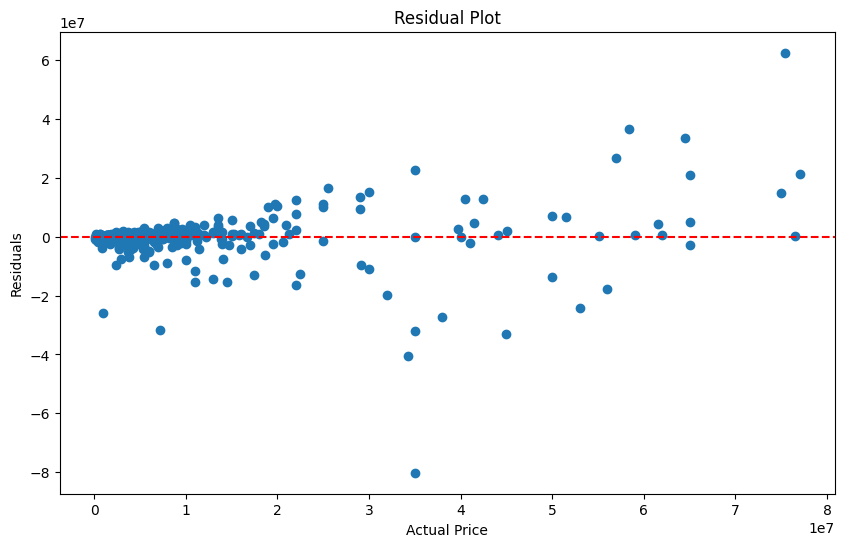

In [93]:
import matplotlib.pyplot as plt

residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_val, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.show()



In [94]:
from transformers import BertTokenizer, BertModel
import torch

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embedding(text):
    tokens = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=50)
    with torch.no_grad():
        outputs = bert_model(**tokens)
    # Use the CLS token's embedding as the representation
    return outputs.last_hidden_state[:, 0, :].numpy()

# Apply embedding extraction to `title` and `description`
df['title_embedding'] = df['title'].apply(get_bert_embedding)
df['description_embedding'] = df['description'].apply(get_bert_embedding)


ImportError: cannot import name 'Tensor' from 'torch' (unknown location)